# § NumPy Basics: Arrays and Vectorized Computation

## § 4.1 The NumPy ndarray : A Multidimensional Array Object 
* Creating ndarrays 88
* Data Types for ndarrays 90
* Arithmetic with NumPy Arrays 93
* Basic Indexing and Slicing 94
* Boolean Indexing 99
* Fancy Indexing 102
* Transposing Arrays and Swapping Axes 103

## § 4.2 Universal Functions: Fast Element-Wise Array Functions
* Expressing Conditional Logic as Array Operations 109
* Mathematical and Statistical Methods 111
* Methods for Boolean Arrays 113
* Sorting 113
* Unique and Other Set Logic 114

## § 4.3 Array-Oriented Programming with Arrays

## § 4.4 File Input and Output with Arrays

## § 4.5 Linear Algebra

## § 4.6 Pseudorandom Number Generation

## § 4.7 Example: Random Walks
* Simulating Many Random Walks at Once 121

In [1]:
import numpy as np
np.random.seed(12345)
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))
np.set_printoptions(precision=4, suppress=True)

In [2]:
import numpy as np
my_arr = np.arange(1000000)
my_list = list(range(1000000))

In [3]:
%time for _ in range(10): my_arr2 = my_arr * 2
%time for _ in range(10): my_list2 = [x * 2 for x in my_list]

Wall time: 23.5 ms
Wall time: 737 ms


## § 4.1 The NumPy ndarray: A Multidimensional Array Object

In [4]:
import numpy as np
# Generate some random data
data = np.random.randn(2, 3)
data

array([[-0.2047,  0.4789, -0.5194],
       [-0.5557,  1.9658,  1.3934]])

In [5]:
data * 10
data + data

array([[-0.4094,  0.9579, -1.0389],
       [-1.1115,  3.9316,  2.7868]])

In [6]:
data.shape
data.dtype

dtype('float64')

### § 4.1.1 Creating ndarrays

In [7]:
data1 = [6, 7.5, 8, 0, 1]
arr1 = np.array(data1)
arr1

array([6. , 7.5, 8. , 0. , 1. ])

In [8]:
data2 = [[1, 2, 3, 4], [5, 6, 7, 8]]
arr2 = np.array(data2)
arr2

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [9]:
arr2.ndim
arr2.shape

(2, 4)

In [10]:
arr1.dtype
arr2.dtype

dtype('int32')

In [11]:
np.zeros(10)
np.zeros((3, 6))
np.empty((2, 3, 2))

array([[[1.1295e-311, 2.5691e-322],
        [0.0000e+000, 0.0000e+000],
        [0.0000e+000, 1.1610e-028]],

       [[5.9716e+175, 1.0948e-065],
        [4.3063e-096, 9.7875e+199],
        [6.9784e+252, 1.0380e-314]]])

In [12]:
np.arange(15)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

###  § 4.1.2 Data Types for ndarrays

In [13]:
arr1 = np.array([1, 2, 3], dtype=np.float64)
arr2 = np.array([1, 2, 3], dtype=np.int32)
arr1.dtype
arr2.dtype

dtype('int32')

In [14]:
arr = np.array([1, 2, 3, 4, 5])
arr.dtype
float_arr = arr.astype(np.float64)
float_arr.dtype

dtype('float64')

In [15]:
arr = np.array([3.7, -1.2, -2.6, 0.5, 12.9, 10.1])
arr
arr.astype(np.int32)

array([ 3, -1, -2,  0, 12, 10])

In [16]:
numeric_strings = np.array(['1.25', '-9.6', '42'], dtype=np.string_)
numeric_strings.astype(float)

array([ 1.25, -9.6 , 42.  ])

In [17]:
int_array = np.arange(10)
calibers = np.array([.22, .270, .357, .380, .44, .50], dtype=np.float64)
int_array.astype(calibers.dtype)

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [18]:
empty_uint32 = np.empty(8, dtype='u4')
empty_uint32

array([         0, 1075314688,          0, 1075707904,          0,
       1075838976,          0, 1072693248], dtype=uint32)

###  § 4.1.3 Arithmetic with NumPy Arrays

In [19]:
arr = np.array([[1., 2., 3.], [4., 5., 6.]])
arr
arr * arr
arr - arr

array([[0., 0., 0.],
       [0., 0., 0.]])

In [20]:
1 / arr
arr ** 0.5

array([[1.    , 1.4142, 1.7321],
       [2.    , 2.2361, 2.4495]])

In [21]:
arr2 = np.array([[0., 4., 1.], [7., 2., 12.]])
arr2
arr2 > arr

array([[False,  True, False],
       [ True, False,  True]])

###  § 4.1.4 Basic Indexing and Slicing

In [22]:
arr = np.arange(10)
arr
arr[5]
arr[5:8]
arr[5:8] = 12
arr

array([ 0,  1,  2,  3,  4, 12, 12, 12,  8,  9])

In [23]:
arr_slice = arr[5:8]
arr_slice

array([12, 12, 12])

In [24]:
arr_slice[1] = 12345
arr

array([    0,     1,     2,     3,     4,    12, 12345,    12,     8,
           9])

In [25]:
arr_slice[:] = 64
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

In [26]:
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
arr2d[2]

array([7, 8, 9])

In [27]:
arr2d[0][2]
arr2d[0, 2]

3

In [28]:
arr3d = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [29]:
arr3d[0]

array([[1, 2, 3],
       [4, 5, 6]])

In [30]:
old_values = arr3d[0].copy()
arr3d[0] = 42
arr3d
arr3d[0] = old_values
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [31]:
arr3d[1, 0]

array([7, 8, 9])

In [32]:
x = arr3d[1]
x
x[0]

array([7, 8, 9])

###  Indexing with slices

In [33]:
arr
arr[1:6]

array([ 1,  2,  3,  4, 64])

In [34]:
arr2d
arr2d[:2]

array([[1, 2, 3],
       [4, 5, 6]])

In [35]:
arr2d[:2, 1:]

array([[2, 3],
       [5, 6]])

In [36]:
arr2d[1, :2]

array([4, 5])

In [37]:
arr2d[:2, 2]

array([3, 6])

In [38]:
arr2d[:, :1]

array([[1],
       [4],
       [7]])

In [39]:
arr2d[:2, 1:] = 0
arr2d

array([[1, 0, 0],
       [4, 0, 0],
       [7, 8, 9]])

### § 4.1.5 Boolean Indexing

In [40]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
data = np.random.randn(7, 4)
names
data

array([[ 0.0929,  0.2817,  0.769 ,  1.2464],
       [ 1.0072, -1.2962,  0.275 ,  0.2289],
       [ 1.3529,  0.8864, -2.0016, -0.3718],
       [ 1.669 , -0.4386, -0.5397,  0.477 ],
       [ 3.2489, -1.0212, -0.5771,  0.1241],
       [ 0.3026,  0.5238,  0.0009,  1.3438],
       [-0.7135, -0.8312, -2.3702, -1.8608]])

In [41]:
names == 'Bob'

array([ True, False, False,  True, False, False, False])

In [42]:
data[names == 'Bob']

array([[ 0.0929,  0.2817,  0.769 ,  1.2464],
       [ 1.669 , -0.4386, -0.5397,  0.477 ]])

In [43]:
data[names == 'Bob', 2:]
data[names == 'Bob', 3]

array([1.2464, 0.477 ])

In [44]:
names != 'Bob'
data[~(names == 'Bob')]

array([[ 1.0072, -1.2962,  0.275 ,  0.2289],
       [ 1.3529,  0.8864, -2.0016, -0.3718],
       [ 3.2489, -1.0212, -0.5771,  0.1241],
       [ 0.3026,  0.5238,  0.0009,  1.3438],
       [-0.7135, -0.8312, -2.3702, -1.8608]])

In [45]:
cond = names == 'Bob'
data[~cond]

array([[ 1.0072, -1.2962,  0.275 ,  0.2289],
       [ 1.3529,  0.8864, -2.0016, -0.3718],
       [ 3.2489, -1.0212, -0.5771,  0.1241],
       [ 0.3026,  0.5238,  0.0009,  1.3438],
       [-0.7135, -0.8312, -2.3702, -1.8608]])

In [46]:
mask = (names == 'Bob') | (names == 'Will')
mask
data[mask]

array([[ 0.0929,  0.2817,  0.769 ,  1.2464],
       [ 1.3529,  0.8864, -2.0016, -0.3718],
       [ 1.669 , -0.4386, -0.5397,  0.477 ],
       [ 3.2489, -1.0212, -0.5771,  0.1241]])

In [47]:
data[data < 0] = 0
data

array([[0.0929, 0.2817, 0.769 , 1.2464],
       [1.0072, 0.    , 0.275 , 0.2289],
       [1.3529, 0.8864, 0.    , 0.    ],
       [1.669 , 0.    , 0.    , 0.477 ],
       [3.2489, 0.    , 0.    , 0.1241],
       [0.3026, 0.5238, 0.0009, 1.3438],
       [0.    , 0.    , 0.    , 0.    ]])

In [48]:
data[names != 'Joe'] = 7
data

array([[7.    , 7.    , 7.    , 7.    ],
       [1.0072, 0.    , 0.275 , 0.2289],
       [7.    , 7.    , 7.    , 7.    ],
       [7.    , 7.    , 7.    , 7.    ],
       [7.    , 7.    , 7.    , 7.    ],
       [0.3026, 0.5238, 0.0009, 1.3438],
       [0.    , 0.    , 0.    , 0.    ]])

### § 4.1.6 Fancy Indexing

In [49]:
arr = np.empty((8, 4))
for i in range(8):
    arr[i] = i
arr

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

In [50]:
arr[[4, 3, 0, 6]]

array([[4., 4., 4., 4.],
       [3., 3., 3., 3.],
       [0., 0., 0., 0.],
       [6., 6., 6., 6.]])

In [51]:
arr[[-3, -5, -7]]

array([[5., 5., 5., 5.],
       [3., 3., 3., 3.],
       [1., 1., 1., 1.]])

In [52]:
arr = np.arange(32).reshape((8, 4))
arr
arr[[1, 5, 7, 2], [0, 3, 1, 2]]

array([ 4, 23, 29, 10])

In [53]:
arr[[1, 5, 7, 2]][:, [0, 3, 1, 2]]

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

### § 4.1.7 Transposing Arrays and Swapping Axes

In [54]:
arr = np.arange(15).reshape((3, 5))
arr
arr.T

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

In [55]:
arr = np.random.randn(6, 3)
arr
np.dot(arr.T, arr)

array([[ 9.2291,  0.9394,  4.948 ],
       [ 0.9394,  3.7662, -1.3622],
       [ 4.948 , -1.3622,  4.3437]])

In [56]:
arr = np.arange(16).reshape((2, 2, 4))
arr
arr.transpose((1, 0, 2))

array([[[ 0,  1,  2,  3],
        [ 8,  9, 10, 11]],

       [[ 4,  5,  6,  7],
        [12, 13, 14, 15]]])

In [57]:
arr
arr.swapaxes(1, 2)

array([[[ 0,  4],
        [ 1,  5],
        [ 2,  6],
        [ 3,  7]],

       [[ 8, 12],
        [ 9, 13],
        [10, 14],
        [11, 15]]])

## § 4.2 Universal Functions: Fast Element-Wise Array Functions

In [58]:
arr = np.arange(10)
arr
np.sqrt(arr)
np.exp(arr)

array([   1.    ,    2.7183,    7.3891,   20.0855,   54.5982,  148.4132,
        403.4288, 1096.6332, 2980.958 , 8103.0839])

In [59]:
x = np.random.randn(8)
y = np.random.randn(8)
x
y
np.maximum(x, y)

array([ 0.8626,  1.0048,  1.3272,  0.6702,  0.853 ,  0.0222,  0.7584,
       -0.6605])

In [64]:
arr = np.random.randn(7) * 5
arr
remainder, whole_part = np.modf(arr)
remainder
whole_part

array([-2., -3., -4., -3.,  1.,  0., -5.])

### Warning : 負數無法根號

In [65]:
arr
np.sqrt(arr)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  


array([   nan,    nan,    nan,    nan, 1.0557, 0.5065,    nan])

In [66]:
np.sqrt(arr, arr)
arr

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


array([   nan,    nan,    nan,    nan, 1.0557, 0.5065,    nan])

## § 4.3 Array-Oriented Programming with Arrays

In [67]:
points = np.arange(-5, 5, 0.01) # 1000 equally spaced points
xs, ys = np.meshgrid(points, points)
ys

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ...,
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

In [68]:
z = np.sqrt(xs ** 2 + ys ** 2)
z

array([[7.0711, 7.064 , 7.0569, ..., 7.0499, 7.0569, 7.064 ],
       [7.064 , 7.0569, 7.0499, ..., 7.0428, 7.0499, 7.0569],
       [7.0569, 7.0499, 7.0428, ..., 7.0357, 7.0428, 7.0499],
       ...,
       [7.0499, 7.0428, 7.0357, ..., 7.0286, 7.0357, 7.0428],
       [7.0569, 7.0499, 7.0428, ..., 7.0357, 7.0428, 7.0499],
       [7.064 , 7.0569, 7.0499, ..., 7.0428, 7.0499, 7.0569]])

Text(0.5, 1.0, 'Image plot of $\\sqrt{x^2 + y^2}$ for a grid of values')

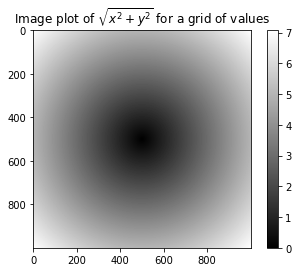

In [69]:
import matplotlib.pyplot as plt
plt.imshow(z, cmap=plt.cm.gray); plt.colorbar()
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")

In [70]:
plt.draw()

<Figure size 432x288 with 0 Axes>

In [71]:
plt.close('all')

### § 4.3.1 Expressing Conditional Logic as Array Operations

In [72]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

In [73]:
result = [(x if c else y)
          for x, y, c in zip(xarr, yarr, cond)]
result

[1.1, 2.2, 1.3, 1.4, 2.5]

In [74]:
result = np.where(cond, xarr, yarr)
result

array([1.1, 2.2, 1.3, 1.4, 2.5])

In [75]:
arr = np.random.randn(4, 4)
arr
arr > 0
np.where(arr > 0, 2, -2)

array([[ 2,  2,  2,  2],
       [-2,  2, -2,  2],
       [ 2,  2, -2,  2],
       [ 2,  2,  2, -2]])

In [76]:
np.where(arr > 0, 2, arr) # set only positive values to 2

array([[ 2.    ,  2.    ,  2.    ,  2.    ],
       [-0.9975,  2.    , -0.1316,  2.    ],
       [ 2.    ,  2.    , -0.1149,  2.    ],
       [ 2.    ,  2.    ,  2.    , -0.7485]])

### § 4.3.2 Mathematical and Statistical Methods

In [77]:
arr = np.random.randn(5, 4)
arr
arr.mean()
np.mean(arr)
arr.sum()

-1.9117900069248925

In [78]:
arr.mean(axis=1)
arr.sum(axis=0)

array([ 0.0965,  0.2588, -1.4873, -0.7798])

In [79]:
arr = np.array([0, 1, 2, 3, 4, 5, 6, 7])
arr.cumsum()

array([ 0,  1,  3,  6, 10, 15, 21, 28], dtype=int32)

In [80]:
arr = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
arr
arr.cumsum(axis=0)
arr.cumprod(axis=1)

array([[  0,   0,   0],
       [  3,  12,  60],
       [  6,  42, 336]], dtype=int32)

### § 4.3.3 Methods for Boolean Arrays

In [81]:
arr = np.random.randn(100)
(arr > 0).sum() # Number of positive values

43

In [82]:
bools = np.array([False, False, True, False])
bools.any()
bools.all()

False

### § 4.3.4 Sorting

In [83]:
arr = np.random.randn(6)
arr
arr.sort()
arr

array([-1.8245, -0.9616, -0.4457, -0.2555,  0.4684,  1.2636])

In [84]:
arr = np.random.randn(5, 3)
arr
arr.sort(1)
arr

array([[ 0.6254,  1.0229,  1.1074],
       [-0.3501,  0.0909,  0.218 ],
       [-1.7415, -1.0523, -0.8948],
       [-2.4203, -0.5762,  1.4366],
       [-1.0623,  0.001 ,  0.2374]])

In [85]:
large_arr = np.random.randn(1000)
large_arr.sort()
large_arr[int(0.05 * len(large_arr))] # 5% quantile

-1.5308984278773312

### § 4.3.5 Unique and Other Set Logic

In [86]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
np.unique(names)
ints = np.array([3, 3, 3, 2, 2, 1, 1, 4, 4])
np.unique(ints)

array([1, 2, 3, 4])

In [87]:
sorted(set(names))

['Bob', 'Joe', 'Will']

In [88]:
values = np.array([6, 0, 0, 3, 2, 5, 6])
np.in1d(values, [2, 3, 6])

array([ True, False, False,  True,  True, False,  True])

##  § 4.4 File Input and Output with Arrays

In [133]:
arr = np.arange(10)
np.save('some_array', arr)

In [134]:
np.load('some_array.npy')

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [140]:
np.savez('array_archive.npz', a=arr, b=arr)

In [141]:
with np.load('array_archive.npz') as arch:
    print(arch['b'])

[0 1 2 3 4 5 6 7 8 9]


In [137]:
np.savez_compressed('arrays_compressed.npz', a=arr, b=arr)

### In linux        : !rm
### In windows : !del

In [138]:
!del some_array.npy
!del array_archive.npz
!del arrays_compressed.npz

## § 4.5 Linear Algebra

In [95]:
x = np.array([[1., 2., 3.], [4., 5., 6.]])
y = np.array([[6., 23.], [-1, 7], [8, 9]])
x
y
x.dot(y)

array([[ 28.,  64.],
       [ 67., 181.]])

In [96]:
np.dot(x, y)

array([[ 28.,  64.],
       [ 67., 181.]])

In [97]:
np.dot(x, np.ones(3))

array([ 6., 15.])

In [98]:
x @ np.ones(3)

array([ 6., 15.])

In [99]:
from numpy.linalg import inv, qr
X = np.random.randn(5, 5)
mat = X.T.dot(X)
inv(mat)
mat.dot(inv(mat))
q, r = qr(mat)
r

array([[-0.9722, -0.8684, -0.7662, -0.1833,  0.4097],
       [ 0.    , -6.2417, -3.5852,  0.4809, -4.253 ],
       [ 0.    ,  0.    , -0.8245,  1.8971, -3.9035],
       [ 0.    ,  0.    ,  0.    , -0.9413,  1.4632],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  0.1324]])

## § 4.6 Pseudorandom Number Generation

In [100]:
samples = np.random.normal(size=(4, 4))
samples

array([[-1.237 , -0.5367,  1.8545, -0.92  ],
       [-0.1082,  0.1525,  0.9435, -1.0953],
       [-0.144 ,  1.9562, -0.2912,  0.1048],
       [ 0.1396, -0.2841, -0.7082,  2.4632]])

In [101]:
from random import normalvariate
N = 1000000
%timeit samples = [normalvariate(0, 1) for _ in range(N)]
%timeit np.random.normal(size=N)

674 ms ± 38.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
22.4 ms ± 142 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [102]:
np.random.seed(1234)

In [103]:
rng = np.random.RandomState(1234)
rng.randn(10)

array([ 0.4714, -1.191 ,  1.4327, -0.3127, -0.7206,  0.8872,  0.8596,
       -0.6365,  0.0157, -2.2427])

## § 4.7 Example: Random Walks

In [104]:
import random
position = 0
walk = [position]
steps = 1000
for i in range(steps):
    step = 1 if random.randint(0, 1) else -1
    position += step
    walk.append(position)

In [105]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

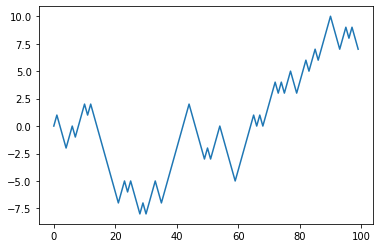

In [106]:
plt.plot(walk[:100])

In [107]:
np.random.seed(12345)

In [108]:
nsteps = 1000
draws = np.random.randint(0, 2, size=nsteps)
steps = np.where(draws > 0, 1, -1)
walk = steps.cumsum()

In [109]:
walk.min()
walk.max()

31

In [110]:
(np.abs(walk) >= 10).argmax()

37

###  § 4.7.1 Simulating Many Random Walks at Once

In [111]:
nwalks = 5000
nsteps = 1000
draws = np.random.randint(0, 2, size=(nwalks, nsteps)) # 0 or 1
steps = np.where(draws > 0, 1, -1)
walks = steps.cumsum(1)
walks

array([[  1,   0,   1, ...,   8,   7,   8],
       [  1,   0,  -1, ...,  34,  33,  32],
       [  1,   0,  -1, ...,   4,   5,   4],
       ...,
       [  1,   2,   1, ...,  24,  25,  26],
       [  1,   2,   3, ...,  14,  13,  14],
       [ -1,  -2,  -3, ..., -24, -23, -22]], dtype=int32)

In [112]:
walks.max()
walks.min()

-133

In [113]:
hits30 = (np.abs(walks) >= 30).any(1)
hits30
hits30.sum() # Number that hit 30 or -30

3410

In [114]:
crossing_times = (np.abs(walks[hits30]) >= 30).argmax(1)
crossing_times.mean()

498.8897360703812

In [115]:
steps = np.random.normal(loc=0, scale=0.25,
                         size=(nwalks, nsteps))

## Conclusion